# draft

In [114]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt


## 판다스: melt, stack

### melt

`-` 설명: 

`-` 데이터

In [160]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

Date  Samsung  Apple  Huawei  Xiaomi  Oppo  Mobicel  Motorola  LG  \
0   2019-10      461    324     136     109    76       81        43  37   
1   2019-11      461    358     167     141    86       61        29  36   
2   2019-12      426    383     143     105    53       45        51  48   
3   2020-01      677    494     212     187   110       79        65  49   
4   2020-02      593    520     217     195   112       67        62  71   
5   2020-03      637    537     246     187    92       66        59  67   
6   2020-04      647    583     222     154    98       59        48  64   
7   2020-05      629    518     192     176    91       87        50  66   
8   2020-06      663    552     209     185    93       69        54  60   
9   2020-07      599    471     214     193    89       78        65  59   
10  2020-08      615    567     204     182   105       82        62  42   
11  2020-09      621    481     230     220   102       88        56  49   
12  2020-10      637    555     232     203    90       52        63  49   

    Others  Realme  Google  Nokia  Lenovo  OnePlus  Sony  Asus  
0      135      28      39     14      22       17    20    17  
1      141      27      29     20      23       10    19    27  
2      129      30      20     26      28       18    18    19  
3      158      23      13     19      19       22    27    22  
4      157      25      18     16      24       18    23    20  
5      145      21      16     24      18       31    22    14  
6      113      20      23     25      19       19    23    21  
7      150      43      27     15      18       19    19    13  
8      140      39      16     16      17       29    25    16  
9      130      40      27     25      21       18    18    12  
10     129      47      16     23      21       27    23    20  
11     143      54      14     15      17       15    19    15  
12     140      33      17     20      22        9    22    21

`-` 사용예시1: 기본사용

In [162]:
df.melt()

variable    value
0       Date  2019-10
1       Date  2019-11
2       Date  2019-12
3       Date  2020-01
4       Date  2020-02
..       ...      ...
216     Asus       16
217     Asus       12
218     Asus       20
219     Asus       15
220     Asus       21

[221 rows x 2 columns]

- tidydata 아님

`-` 사용예시2: id_vars --> tidy data 

In [165]:
df.melt(id_vars='Date')

Date variable  value
0    2019-10  Samsung    461
1    2019-11  Samsung    461
2    2019-12  Samsung    426
3    2020-01  Samsung    677
4    2020-02  Samsung    593
..       ...      ...    ...
203  2020-06     Asus     16
204  2020-07     Asus     12
205  2020-08     Asus     20
206  2020-09     Asus     15
207  2020-10     Asus     21

[208 rows x 3 columns]

- tidydata

`-` 사용예시3: 

In [170]:
df.set_index('Date').melt()

variable  value
0    Samsung    461
1    Samsung    461
2    Samsung    426
3    Samsung    677
4    Samsung    593
..       ...    ...
203     Asus     16
204     Asus     12
205     Asus     20
206     Asus     15
207     Asus     21

[208 rows x 2 columns]

- tidydata, 그런데 Date에 대한 정보는 손상되었음 

`-` 사용예시4: ignore_index=False

In [174]:
df.set_index('Date').melt(ignore_index=False).reset_index()

Date variable  value
0    2019-10  Samsung    461
1    2019-11  Samsung    461
2    2019-12  Samsung    426
3    2020-01  Samsung    677
4    2020-02  Samsung    593
..       ...      ...    ...
203  2020-06     Asus     16
204  2020-07     Asus     12
205  2020-08     Asus     20
206  2020-09     Asus     15
207  2020-10     Asus     21

[208 rows x 3 columns]

- tidydata 

### stack

`-` 설명: 

In [149]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')\
.groupby(["AIRLINE","WEEKDAY"]).agg({"CANCELLED":[np.mean,"count"],"DIVERTED":[np.mean,"count"]})
df

CANCELLED        DIVERTED      
                     mean count      mean count
AIRLINE WEEKDAY                                
AA      1        0.032106  1277  0.004699  1277
        2        0.007341  1226  0.001631  1226
        3        0.011949  1339  0.001494  1339
        4        0.015004  1333  0.003751  1333
        5        0.014151  1272  0.000786  1272
...                   ...   ...       ...   ...
WN      3        0.014118  1275  0.001569  1275
        4        0.007911  1264  0.003165  1264
        5        0.005828  1201  0.000000  1201
        6        0.010132   987  0.003040   987
        7        0.006066  1154  0.002600  1154

[98 rows x 4 columns]

`-` 사용예시1

In [155]:
df.stack()

CANCELLED     DIVERTED
AIRLINE WEEKDAY                                
AA      1       mean      0.032106     0.004699
                count  1277.000000  1277.000000
        2       mean      0.007341     0.001631
                count  1226.000000  1226.000000
        3       mean      0.011949     0.001494
...                            ...          ...
WN      5       count  1201.000000  1201.000000
        6       mean      0.010132     0.003040
                count   987.000000   987.000000
        7       mean      0.006066     0.002600
                count  1154.000000  1154.000000

[196 rows x 2 columns]

`-` 사용예시2

In [157]:
df.stack().stack()

AIRLINE  WEEKDAY                  
AA       1        mean   CANCELLED       0.032106
                         DIVERTED        0.004699
                  count  CANCELLED    1277.000000
                         DIVERTED     1277.000000
         2        mean   CANCELLED       0.007341
                                         ...     
WN       6        count  DIVERTED      987.000000
         7        mean   CANCELLED       0.006066
                         DIVERTED        0.002600
                  count  CANCELLED    1154.000000
                         DIVERTED     1154.000000
Length: 392, dtype: float64

`-` 사용예시3 (unstack)

In [159]:
df.stack().unstack()

CANCELLED          DIVERTED        
                     mean   count      mean   count
AIRLINE WEEKDAY                                    
AA      1        0.032106  1277.0  0.004699  1277.0
        2        0.007341  1226.0  0.001631  1226.0
        3        0.011949  1339.0  0.001494  1339.0
        4        0.015004  1333.0  0.003751  1333.0
        5        0.014151  1272.0  0.000786  1272.0
...                   ...     ...       ...     ...
WN      3        0.014118  1275.0  0.001569  1275.0
        4        0.007911  1264.0  0.003165  1264.0
        5        0.005828  1201.0  0.000000  1201.0
        6        0.010132   987.0  0.003040   987.0
        7        0.006066  1154.0  0.002600  1154.0

[98 rows x 4 columns]

> melt, stack 을 set_index와 reset_index와 함께 사용하면 tidydata를 만들기 용이하다. 

## tidydata

### tidydata의 정의 

`-` 느낌: ggplot으로 그림 그리기 좋은 데이터 + pandas로 query, group by 등을 쓰기 좋은 자료 

`-` 정의: https://r4ds.had.co.nz/tidy-data.html
- Each variable must have its own column.
- Each observation must have its own row.
- Each value must have its own cell.

예시1 (tidy data) 

|obs|x|y|shape|color|
|:-:|:-:|:-:|:-:|:-:|
|0|0|0 |'star'|'F'|
|1|0|1 |'circ'|'F'|
|2|1|0 |'star'|'M'|
|3|1|1 |'circ'|'M'|

예시2 (tidy data x)

| |shape=star|shape=circ|
|:-:|:-:|:-:|
|color=F|(0,0)|(0,1)|
|color=M|(1,0)|(1,1)|



### 예제1: long df

`-` data

In [202]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

Date  Samsung  Apple  Huawei  Xiaomi  Oppo  Mobicel  Motorola  LG  \
0   2019-10      461    324     136     109    76       81        43  37   
1   2019-11      461    358     167     141    86       61        29  36   
2   2019-12      426    383     143     105    53       45        51  48   
3   2020-01      677    494     212     187   110       79        65  49   
4   2020-02      593    520     217     195   112       67        62  71   
5   2020-03      637    537     246     187    92       66        59  67   
6   2020-04      647    583     222     154    98       59        48  64   
7   2020-05      629    518     192     176    91       87        50  66   
8   2020-06      663    552     209     185    93       69        54  60   
9   2020-07      599    471     214     193    89       78        65  59   
10  2020-08      615    567     204     182   105       82        62  42   
11  2020-09      621    481     230     220   102       88        56  49   
12  2020-10      637    555     232     203    90       52        63  49   

    Others  Realme  Google  Nokia  Lenovo  OnePlus  Sony  Asus  
0      135      28      39     14      22       17    20    17  
1      141      27      29     20      23       10    19    27  
2      129      30      20     26      28       18    18    19  
3      158      23      13     19      19       22    27    22  
4      157      25      18     16      24       18    23    20  
5      145      21      16     24      18       31    22    14  
6      113      20      23     25      19       19    23    21  
7      150      43      27     15      18       19    19    13  
8      140      39      16     16      17       29    25    16  
9      130      40      27     25      21       18    18    12  
10     129      47      16     23      21       27    23    20  
11     143      54      14     15      17       15    19    15  
12     140      33      17     20      22        9    22    21

`-` tidydata로 변환 

In [182]:
df.set_index('Date').stack().reset_index()

Date  level_1    0
0    2019-10  Samsung  461
1    2019-10    Apple  324
2    2019-10   Huawei  136
3    2019-10   Xiaomi  109
4    2019-10     Oppo   76
..       ...      ...  ...
203  2020-10    Nokia   20
204  2020-10   Lenovo   22
205  2020-10  OnePlus    9
206  2020-10     Sony   22
207  2020-10     Asus   21

[208 rows x 3 columns]

### 예제2: multi-indexed data

`-` 데이터

In [203]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')\
.groupby(["AIRLINE","WEEKDAY"]).agg({"CANCELLED":[np.mean,"count"],"DIVERTED":[np.mean,"count"]})
df

CANCELLED        DIVERTED      
                     mean count      mean count
AIRLINE WEEKDAY                                
AA      1        0.032106  1277  0.004699  1277
        2        0.007341  1226  0.001631  1226
        3        0.011949  1339  0.001494  1339
        4        0.015004  1333  0.003751  1333
        5        0.014151  1272  0.000786  1272
...                   ...   ...       ...   ...
WN      3        0.014118  1275  0.001569  1275
        4        0.007911  1264  0.003165  1264
        5        0.005828  1201  0.000000  1201
        6        0.010132   987  0.003040   987
        7        0.006066  1154  0.002600  1154

[98 rows x 4 columns]

`-` tidydata로 변환: stack으로 풀면 너무 쉬우니까 melt로.. 

In [208]:
df.melt(ignore_index=False).reset_index()

AIRLINE  WEEKDAY variable_0 variable_1        value
0        AA        1  CANCELLED       mean     0.032106
1        AA        2  CANCELLED       mean     0.007341
2        AA        3  CANCELLED       mean     0.011949
3        AA        4  CANCELLED       mean     0.015004
4        AA        5  CANCELLED       mean     0.014151
..      ...      ...        ...        ...          ...
387      WN        3   DIVERTED      count  1275.000000
388      WN        4   DIVERTED      count  1264.000000
389      WN        5   DIVERTED      count  1201.000000
390      WN        6   DIVERTED      count   987.000000
391      WN        7   DIVERTED      count  1154.000000

[392 rows x 5 columns]

## barplot 

### 기본사용법

In [106]:
g=['A']*100+['B']*200 
y=list(np.random.randn(100)*2+2)+list(np.random.randn(200)+3)
df=pd.DataFrame({'g':g,'y':y})
df

g         y
0    A  1.512043
1    A  2.607010
2    A  4.680375
3    A  3.696806
4    A  3.297729
..  ..       ...
295  B  3.239580
296  B  2.391294
297  B  3.434171
298  B  1.774713
299  B  3.159989

[300 rows x 2 columns]

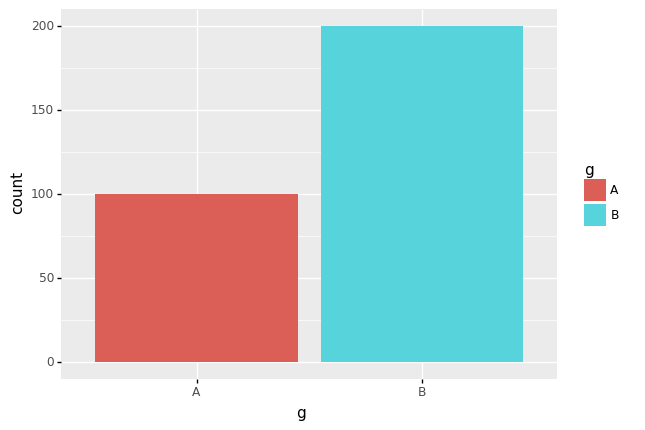

<ggplot: (8739005569593)>

In [107]:
ggplot(df)+geom_bar(aes(x='g',fill='g')) ## 디폴트로 카운트를 수행해줌

`-` 이것은 아래의 코드와 같다. 

In [109]:
df.groupby(by='g').count().reset_index()

g    y
0  A  100
1  B  200

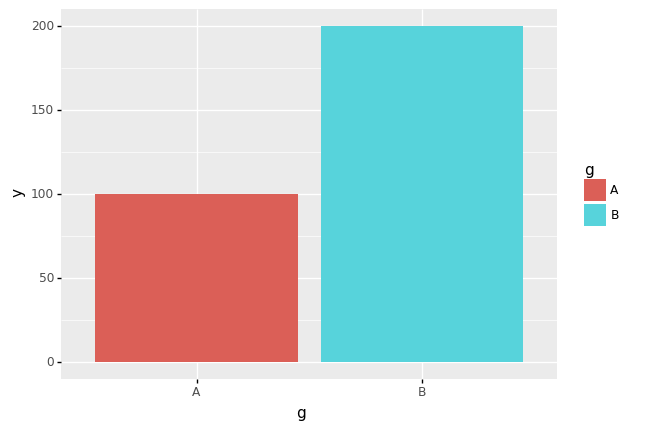

<ggplot: (8739005498849)>

In [110]:
fig=ggplot(df.groupby(by='g').count().reset_index())
fig+geom_bar(aes(x='g',y='y',fill='g'),stat='identity')

`-` barplot은 기본적으로 groupby+count()가 내장되어 있다. 따라서 아래의 코드 

```r
ggplot(df)+geom_bar(aes(x='g',fill='g')) ## 디폴트로 카운트를 수행해줌
```

를 좀더 엄밀하게 쓰면 

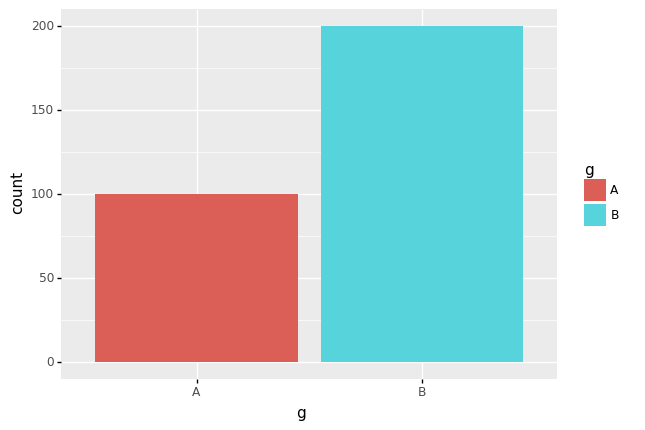

<ggplot: (8739005445657)>

In [111]:
ggplot(df)+geom_bar(aes(x='g',fill='g'),stat='count') 

`-` 이것은 때때로 불편하다. 왜냐하면 데이터프레임을 변환하는 것은 판다스를 이용하는게 더 쉽고 자유로움 

### barplot의 불편한점1

In [112]:
td=df.groupby(by='g').count().reset_index()
td

g    y
0  A  100
1  B  200

`-` 그냥 'x=g, y=y'를 맵핑하여 그리면 안되나? 

<BarContainer object of 2 artists>

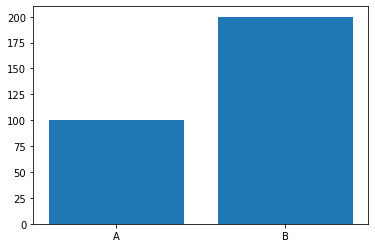

In [115]:
plt.bar(td.g,td.y)

<AxesSubplot:xlabel='g'>

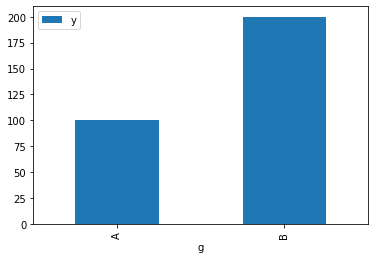

In [116]:
td.plot(kind='bar',x='g',y='y')

`-` 그런데 ggplot을 쓰려고 하면?

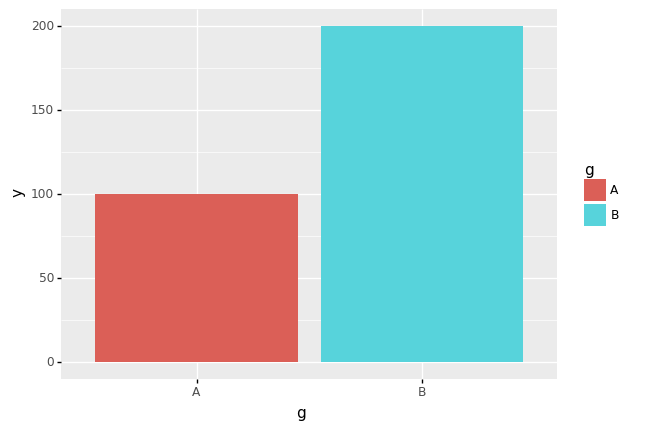

<ggplot: (8739005441005)>

In [118]:
ggplot(td)+geom_bar(aes(x='g',y='y',fill='g'),stat='identity') 

- 너무 불편해요.. stat='identity' 를 항상 써야하는것이!

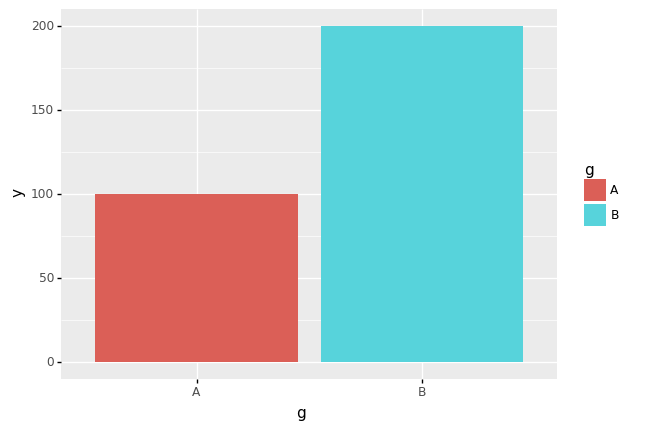

<ggplot: (8739005254909)>

In [119]:
ggplot(td)+geom_col(aes(x='g',y='y',fill='g')) 

- 그럴땐 그냥 geom_col 을 하면 된다. 

### barplot의 불편한점2

`-` groupby 를 자동으로 해주므로 익숙해지면 ggplot2 방식이 더 편하지 않을까? $\to$ groupby 하는게 더 편해요.. 

In [121]:
df.groupby('g').agg({'y':[np.mean,np.median,np.std,lambda x: np.max(x)-np.min(x)]})

y                               
       mean    median       std <lambda_0>
g                                         
A  2.375419  2.638854  1.963668   8.888167
B  2.933778  2.835038  1.033119   5.049888

In [122]:
df.groupby('g')\
.agg({'y':[np.mean,np.median,np.std,lambda x: np.max(x)-np.min(x)]})\
.rename(columns={'<lambda_0>':'range'}).stack().reset_index()

g level_1         y
0  A    mean  2.375419
1  A  median  2.638854
2  A   range  8.888167
3  A     std  1.963668
4  B    mean  2.933778
5  B  median  2.835038
6  B   range  5.049888
7  B     std  1.033119

In [123]:
td=df.groupby('g')\
.agg({'y':[np.mean,np.median,np.std,lambda x: np.max(x)-np.min(x)]})\
.rename(columns={'<lambda_0>':'range'}).stack().reset_index()

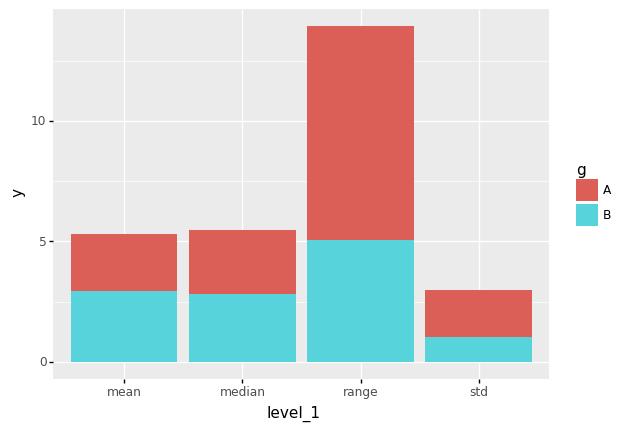

<ggplot: (8739005188705)>

In [124]:
ggplot(td)+geom_col(aes(x='level_1',y='y',fill='g'))

- 쌓인상태로 보이는것이 불편함. $\to$ position='dodge' 로!

### position 

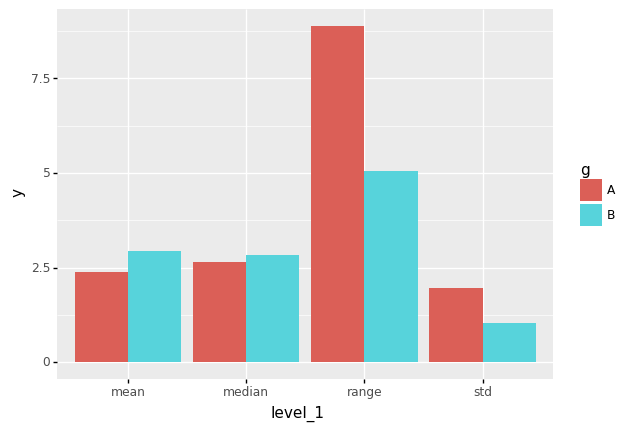

<ggplot: (8739005159325)>

In [125]:
ggplot(td)+geom_col(aes(x='level_1',y='y',fill='g'),position='dodge')

### coord_flip()

`-` 때때로 아래와 같이 보는 것이 더 좋은 경우도 있음 

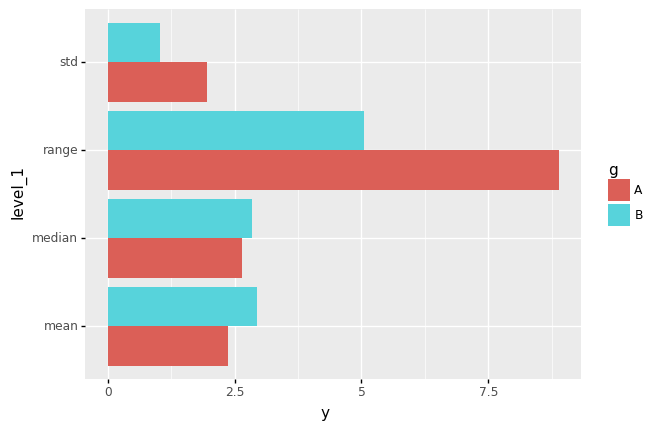

<ggplot: (8739005226097)>

In [126]:
ggplot(td)\
+geom_col(aes(x='level_1',y='y',fill='g'),position='dodge')\
+coord_flip()

### facet_wrap()

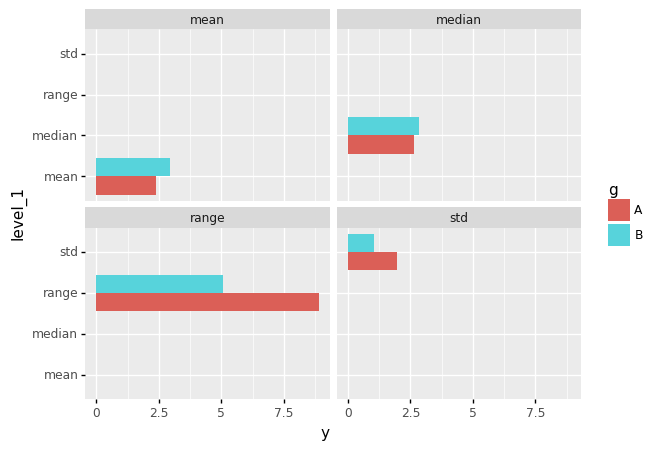

<ggplot: (8739005194125)>

In [127]:
ggplot(td)\
+geom_col(aes(x='level_1',y='y',fill='g'),position='dodge')\
+coord_flip()+facet_wrap('level_1')

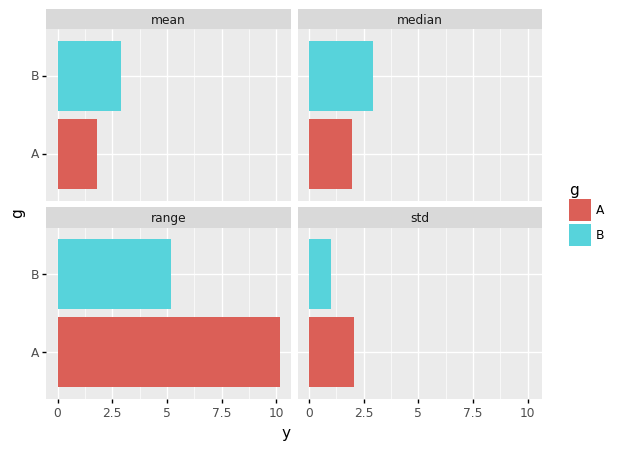

<ggplot: (8726958748290)>

In [158]:
ggplot(td)\
+geom_bar(aes(x='g',y='y',fill='g'),stat='identity',position='dodge')\
+coord_flip()+facet_wrap('level_1')

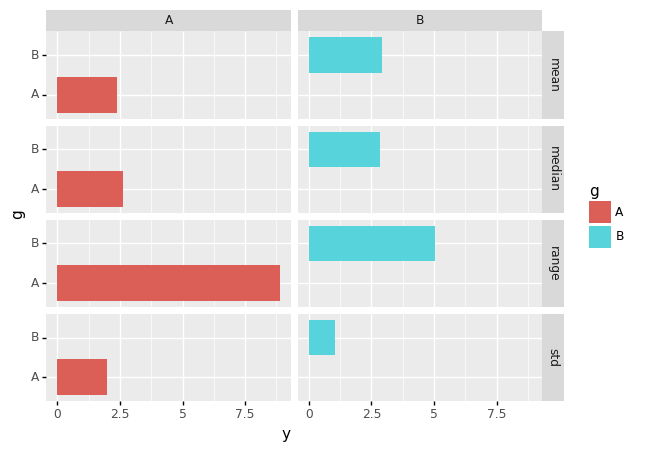

<ggplot: (8739004934113)>

In [128]:
ggplot(td)+facet_grid('level_1~g')\
+geom_col(aes(x='g',y='y',fill='g'),position='dodge')+coord_flip()

## 해들리위컴의 그래프레이어

`-` data + aes + geom + position + stat + coord + facet
- data: pandas dataframe 
- aes: x축, y축, 색깔, 크기, 투명도 
- geom: 포인트지옴, 바지옴, 라인지옴, 스무스지옴 
- position: jitter, dodge, intentity 
- stat: identity, count 
- coord: coord_flip()
- facet: facet_wrap(), facet_grid()

`-` 해들리위컴의 주장: ggplot2는 자료가 tidydata형태로 정리되어 있을경우 해들리위컴의 그래프레이어에 따라 시각화하는 최상의 툴이다.

`-` 내 생각
- 해들리위컴의 그래프레이어는 tabular data에 한정하여 맞는 개념임 (그런데 요즘은 안그런 데이터도 있어) 
- tabular data라고 할지라도 ggplot2의 보다 좀 더 좋은 시각화 툴이 개발되었다고 생각 (plotly 등) 

## 심슨의 역설

In [91]:
DEP=(['A1']*2+['A2']*2+['B1']*2+['B2']*2)*2 
GEN=['M']*8+['F']*8
STATE=['PASS','FAIL']*8
COUNT=[1,9,2,8,80,20,85,15,5,5,5,5,9,1,9,1]

In [92]:
df=pd.DataFrame({'DEP':DEP,'STATE':STATE,'GEN':GEN,'COUNT':COUNT})

In [95]:
df

DEP STATE GEN  COUNT
0   A1  PASS   M      1
1   A1  FAIL   M      9
2   A2  PASS   M      2
3   A2  FAIL   M      8
4   B1  PASS   M     80
5   B1  FAIL   M     20
6   B2  PASS   M     85
7   B2  FAIL   M     15
8   A1  PASS   F      5
9   A1  FAIL   F      5
10  A2  PASS   F      5
11  A2  FAIL   F      5
12  B1  PASS   F      9
13  B1  FAIL   F      1
14  B2  PASS   F      9
15  B2  FAIL   F      1

In [172]:
df.groupby(['GEN','STATE']).agg({'COUNT':np.sum})

COUNT
GEN STATE       
F   FAIL      12
    PASS      28
M   FAIL      52
    PASS     168

### 시각화1: 전체합격률

In [177]:
df.groupby(['GEN','STATE']).agg({'COUNT':np.sum})

COUNT
GEN STATE       
F   FAIL      12
    PASS      28
M   FAIL      52
    PASS     168

In [178]:
df.groupby(['GEN','STATE']).agg({'COUNT':np.sum}).reset_index()

GEN STATE  COUNT
0   F  FAIL     12
1   F  PASS     28
2   M  FAIL     52
3   M  PASS    168

In [179]:
df.groupby(['GEN']).agg({'COUNT':np.sum}).reset_index()

GEN  COUNT
0   F     40
1   M    220

`-` 두개의 데이터프레임을 합쳐야 한다. 

In [226]:
_df1=df.groupby(['GEN','STATE']).agg({'COUNT':np.sum}).reset_index()
_df2=df.groupby(['GEN']).agg({'COUNT':np.sum}).reset_index().rename(columns={'COUNT':'SUM'})

In [227]:
display(_df1)
display(_df2)

GEN STATE  COUNT
0   F  FAIL     12
1   F  PASS     28
2   M  FAIL     52
3   M  PASS    168

GEN  SUM
0   F   40
1   M  220

`-` 단순한 방법

In [228]:
def f(x): 
    if x=='F':
        return 40 
    if x=='M':
        return 220 

In [229]:
_df1['SUM']=list(map(f,_df1.GEN))
_df1

GEN STATE  COUNT  SUM
0   F  FAIL     12   40
1   F  PASS     28   40
2   M  FAIL     52  220
3   M  PASS    168  220

`-` 좀 더 좋은 방법 

In [230]:
_df1=df.groupby(['GEN','STATE']).agg({'COUNT':np.sum}).reset_index()

- _df1를 다시 롤백

In [231]:
def f(_df2): 
    return lambda x: _df2.query('GEN == @x').SUM.item()

In [232]:
_df1.GEN

0    F
1    F
2    M
3    M
Name: GEN, dtype: object

In [233]:
_df1['SUM']=list(map(f(_df2),_df1.GEN))
_df1

GEN STATE  COUNT  SUM
0   F  FAIL     12   40
1   F  PASS     28   40
2   M  FAIL     52  220
3   M  PASS    168  220

`-` 더 좋은 방법

In [234]:
_df1=df.groupby(['GEN','STATE']).agg({'COUNT':np.sum}).reset_index()

- _df1을 다시 롤백

In [236]:
_df1

GEN STATE  COUNT
0   F  FAIL     12
1   F  PASS     28
2   M  FAIL     52
3   M  PASS    168

In [237]:
_df2

GEN  SUM
0   F   40
1   M  220

In [235]:
pd.merge(_df1,_df2)

GEN STATE  COUNT  SUM
0   F  FAIL     12   40
1   F  PASS     28   40
2   M  FAIL     52  220
3   M  PASS    168  220

In [239]:
_df1.merge(_df2)

GEN STATE  COUNT  SUM
0   F  FAIL     12   40
1   F  PASS     28   40
2   M  FAIL     52  220
3   M  PASS    168  220

In [240]:
_df2.merge(_df1)

GEN  SUM STATE  COUNT
0   F   40  FAIL     12
1   F   40  PASS     28
2   M  220  FAIL     52
3   M  220  PASS    168

In [244]:
td=_df2.merge(_df1)
td

GEN  SUM STATE  COUNT
0   F   40  FAIL     12
1   F   40  PASS     28
2   M  220  FAIL     52
3   M  220  PASS    168

In [245]:
td['PROP']=td.COUNT/td.SUM

In [246]:
td

GEN  SUM STATE  COUNT      PROP
0   F   40  FAIL     12  0.300000
1   F   40  PASS     28  0.700000
2   M  220  FAIL     52  0.236364
3   M  220  PASS    168  0.763636

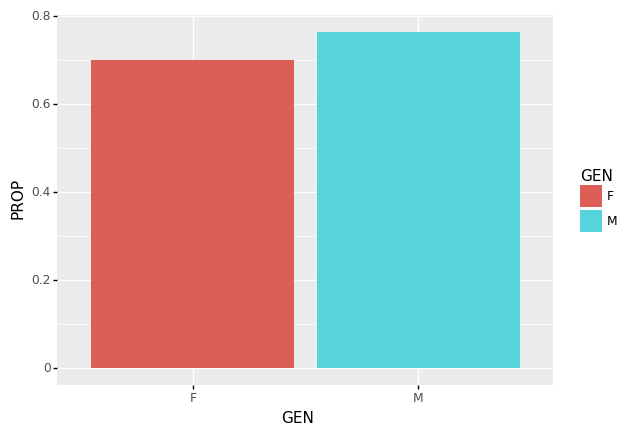

<ggplot: (8726958443650)>

In [249]:
ggplot(td.query('STATE=="PASS"'))+geom_bar(aes(x='GEN',y='PROP',fill='GEN'),stat='identity')

`-` 남자의 합격률이 더 높다. $\to$ 성차별이 있어보인다(?)

### 시각화2: 학과별 합격률

`-` 학과별 합격률 

In [281]:
df

DEP STATE GEN  COUNT
0   A1  PASS   M      1
1   A1  FAIL   M      9
2   A2  PASS   M      2
3   A2  FAIL   M      8
4   B1  PASS   M     80
5   B1  FAIL   M     20
6   B2  PASS   M     85
7   B2  FAIL   M     15
8   A1  PASS   F      5
9   A1  FAIL   F      5
10  A2  PASS   F      5
11  A2  FAIL   F      5
12  B1  PASS   F      9
13  B1  FAIL   F      1
14  B2  PASS   F      9
15  B2  FAIL   F      1

In [286]:
td=df.groupby(['DEP','GEN']).agg({'COUNT':sum}).reset_index()\
.rename(columns={'COUNT':'SUM'}).merge(df)

In [288]:
td['PROP']=td.COUNT/td.SUM

In [289]:
td

DEP GEN  SUM STATE  COUNT  PROP
0   A1   F   10  PASS      5  0.50
1   A1   F   10  FAIL      5  0.50
2   A1   M   10  PASS      1  0.10
3   A1   M   10  FAIL      9  0.90
4   A2   F   10  PASS      5  0.50
5   A2   F   10  FAIL      5  0.50
6   A2   M   10  PASS      2  0.20
7   A2   M   10  FAIL      8  0.80
8   B1   F   10  PASS      9  0.90
9   B1   F   10  FAIL      1  0.10
10  B1   M  100  PASS     80  0.80
11  B1   M  100  FAIL     20  0.20
12  B2   F   10  PASS      9  0.90
13  B2   F   10  FAIL      1  0.10
14  B2   M  100  PASS     85  0.85
15  B2   M  100  FAIL     15  0.15

In [290]:
td.query('STATE=="PASS"')

DEP GEN  SUM STATE  COUNT  PROP
0   A1   F   10  PASS      5  0.50
2   A1   M   10  PASS      1  0.10
4   A2   F   10  PASS      5  0.50
6   A2   M   10  PASS      2  0.20
8   B1   F   10  PASS      9  0.90
10  B1   M  100  PASS     80  0.80
12  B2   F   10  PASS      9  0.90
14  B2   M  100  PASS     85  0.85

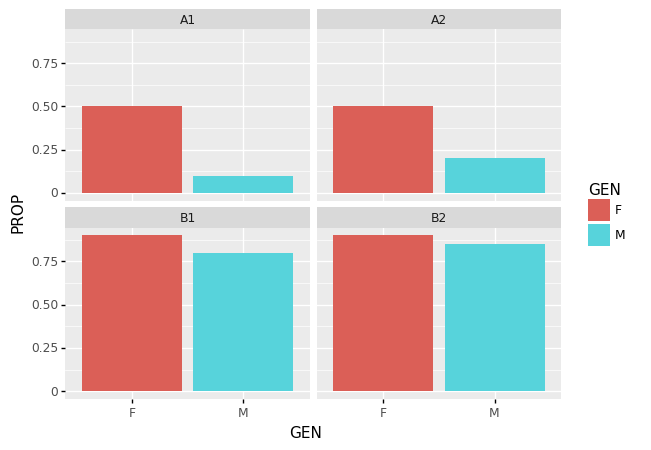

<ggplot: (8726962449285)>

In [293]:
ggplot(td.query('STATE=="PASS"'))\
+geom_bar(aes(x='GEN',y='PROP',fill='GEN'),stat='identity')\
+facet_wrap('DEP')